# Linear Regression

#### Problem Statement:-
We need to predict the chance of admission based on the Student various scores.

In [1]:
# importing necessary libraries:-
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# Read csv file and convert into dataframe
data=pd.read_csv('Admission_Prediction.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


###### Here features or independent variable or predictors are:-
- GRE Score
- TOEFL Score
- University Rating
- SOP
- LOR
- CGPA
- Research
###### and here Lable or Target or dependent variable is:-
- Chance of Admission

In [4]:
data.shape

(500, 9)

In [5]:
#Understanding data at high level, we check the statistics of data set
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


###### now we will start documentation 
- which column are not useful delete them . { exp- serial no.}
- Count:- Which column has Nan values
- Mean:- check which is categorical data columns.
- std:- check standard variance is not going extra large.
- min, 25%,50%,75%, max:- check the quartiles & check is there are any outliers.

In [6]:
# Fill the null values
data['University Rating']= data['University Rating'].fillna(data['University Rating'].mode()[0])   #{[0] here it means that exp:- x=(22,23,24,22,24) then mode=(22,23) Then the index of 22 is 0 is 23 is 1}
data['TOEFL Score']= data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']= data['GRE Score'].fillna(data['GRE Score'].mean())

# verify if Nan's are filled or not
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


- "Now data looks good and there are no missing values. Also thee  first columns is just  serrial numbers so we don't need that column. Let's drop it from data"

In [7]:
#dropping unwanted columns
data=data.drop('Serial No.', axis=1)
# other technique  # data= data.drop(columns=[column1,column2.....])
# data.drop(columns=['Serial No.'], inplace=True)

###### Let's visualize  the data and analyze the  relationship between independent and dependent variables.
- "If my data (specially continous data) is not normally distributed than it is  a big problem".
- So we have to first make the daa perfactly normally distributed.


C:\Users\Hello\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hello\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hello\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

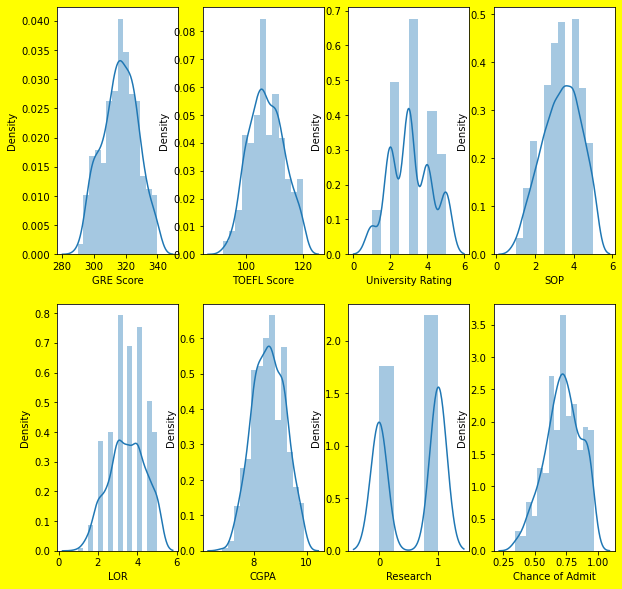

In [11]:
# let's see how data is distributed for every column.
plt.figure(figsize=(10,10), facecolor='Yellow')
plotnumber=1
for val in data:
    if plotnumber<=30:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[val])
        plt.xlabel(val,fontsize=10)
    plotnumber +=1
plt.show()



In [12]:
# The data distribution looks decent enough and there doesn't seem to be any skewness. 
# Great let's go ahead!

In [15]:
# let's observe the relationship between independent variables and dependent variable.
# divide data set into features and label
y= data['Chance of Admit']
print(y)
x=data.drop('Chance of Admit', axis=1)
print(x)

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64
      GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
0    337.000000        118.0                4.0  4.5  4.5  9.65         1
1    324.000000        107.0                4.0  4.0  4.5  8.87         1
2    316.558763        104.0                3.0  3.0  3.5  8.00         1
3    322.000000        110.0                3.0  3.5  2.5  8.67         1
4    314.000000        103.0                2.0  2.0  3.0  8.21         0
..          ...          ...                ...  ...  ...   ...       ...
495  332.000000        108.0                5.0  4.5  4.0  9.02         1
496  337.000000        117.0                5.0  5.0  5.0  9.87         1
497  330.000000        120.0                5.0  4.5  5.0  9.56         1
498  312.000000        103.0                4.0  4.0  5.0  8.43         0
499

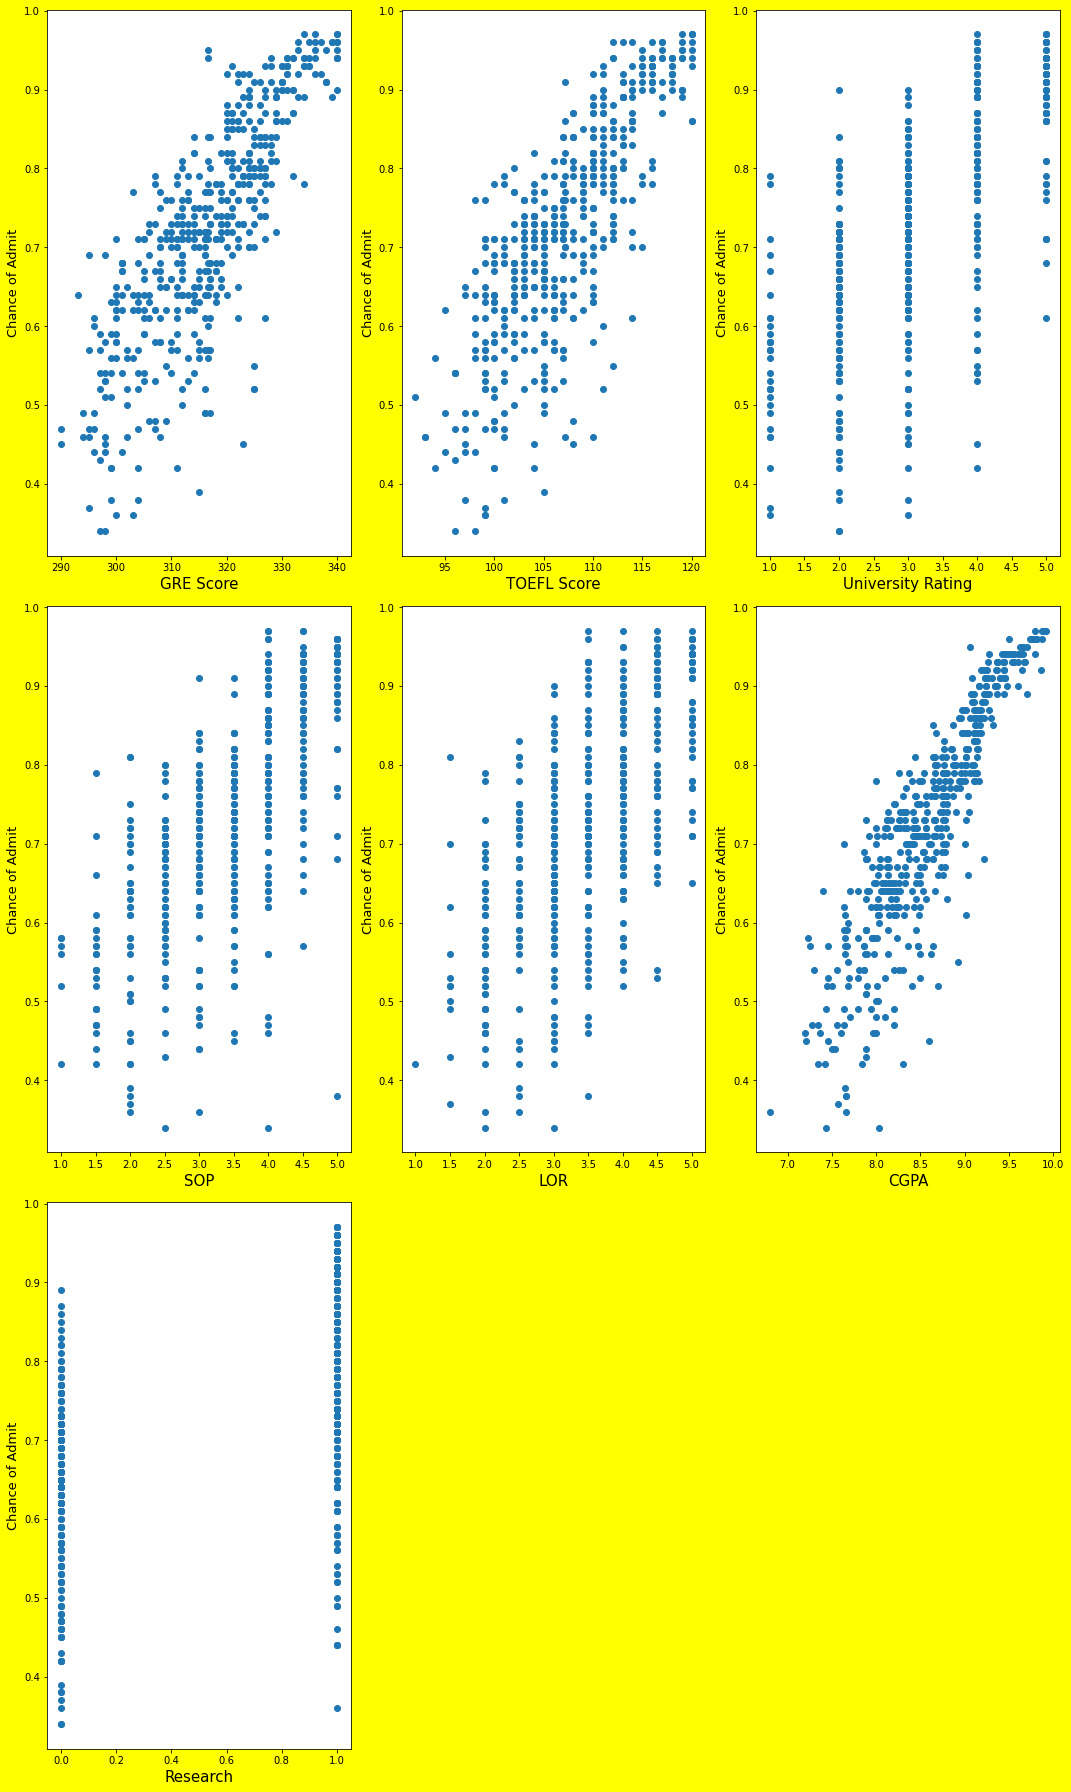

In [22]:
# visualizing relationship
plt.figure(figsize=(15,25), facecolor='Yellow')
plotnumber=1
for val in x:
    if plotnumber<=15:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(x[val],y)
        plt.xlabel(val, fontsize=15)
        plt.ylabel('Chance of Admit', fontsize=13)
    plotnumber+=1
plt.tight_layout()

###  Now we can clearly visualize that every feature has unique relation with label.

##### Great thee relationship between thee  dependent & independent variables look fairly linear. Thus our linearty assumption is satisfied.

#### Standard Scaler
- We now that there are all feature has it's own unit. it may be possible that my model will give more importance to the bigger number just because it's unit is large. so it is big problem
- now we will use standard scaler technique. After applying standard scaler technique all feature has linear unit.

In [37]:
# data scaling formula is  z=(x - Mean)/std.
# from sklearn we already import standard Scaler
scaler= StandardScaler()
X_scaled= scaler.fit_transform(x)



### Train Test Split
###### We split the dataset in four parts{ x_train, y_train, x_test, y_test}. We will take 75% of the dataset for training & 25% for testing.
###### Once my model will train I will take the test and compare between Actual result vs Predicted result. After comparing we will get a score & this score will tell us how good our model

In [25]:
from sklearn.model_selection import train_test_split

In [30]:
# split data into train and test, model will be  built on training data and tested on test data.
x_train,x_test,y_train,y_test= train_test_split(X_scaled,y,test_size= 0.25, random_state=77)
# above formula has to be in same order everytime & anywhere
# Text_size mean, how  much % of your data set will take for testing
# random_state: it has his  own way to picking to data. randomly it will pick for 75% data for training.
# we will put x scaled data, which we scaled before

In [31]:
y_train.head()

148    0.96
141    0.90
367    0.57
309    0.70
67     0.57
Name: Chance of Admit, dtype: float64

In [35]:
y_test.head()

310    0.76
354    0.59
443    0.87
52     0.78
155    0.77
Name: Chance of Admit, dtype: float64

### Model instantiating & Training


In [38]:
regression=LinearRegression()
regression.fit(x_train, y_train)   # my model are understating & learning
# x_feature= feature
# y_train = resppective label

LinearRegression()

In [40]:
# predict the chance of admission given feature
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [41]:
#let's compare
print('Chance of Admission is : ', regression.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]])))
# since we have already fit the scaler data, you can transform the data on this way.


Chance of Admission is :  [0.82464769]


C:\Users\Hello\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [42]:
# saving the model to the local file system
# import pickle
# filename= 'Finalized_model.pickle'   # you can give any  name, it's your choice
# pickle.dump(regression, open(filename,'wb'))
#prediction using he save  model # Reload
# loaded_model = pickle.load(open(filename, 'rb'))
# a= loaded_model.pickle(scaler.transform([[314,103,2,2,3,8,21,0]]))
# a
# This is not a big data set, it is only for understating purpose that how to save the model. That's why I don't save it.

In [44]:
# Adjusted R squared score
regression.score(x_train, y_train)
# iska matlab hai ki total me se kitna % hmara model train hua  hai. ya kitna usne learn kiya  hai

0.8297109210834551

In [47]:
# let's check how well model fits the test data.
regression.score(x_test, y_test)
# iska mtlb hai ki training ko smjh ke ye kitna % test deta sahi deta hai

0.7875873845791397

In [48]:
# Now  I want to give whole test data. before we take only one student data but now we give all student data
y_pred= regression.predict(x_test)

In [49]:
y_pred

array([0.75296215, 0.52396566, 0.8532596 , 0.71295046, 0.72521424,
       0.78882181, 0.77456341, 0.58079267, 0.72116892, 0.8608089 ,
       0.89585574, 0.7267702 , 0.77079159, 0.66341643, 0.7587857 ,
       0.90269621, 0.95386792, 0.83226755, 0.61521906, 0.73462448,
       0.69151118, 0.83609588, 0.5901781 , 0.88103861, 0.63926603,
       0.79084388, 0.76111507, 0.5669776 , 0.77539002, 0.48261882,
       0.60524769, 0.82055352, 0.75601289, 0.80500403, 0.72450905,
       0.65092497, 0.65315187, 0.64275815, 0.74375348, 0.88150372,
       0.90769141, 0.79716959, 0.65273367, 0.56934844, 0.76120442,
       0.85064704, 0.99293387, 0.66748257, 0.70969686, 0.79062313,
       0.91639637, 0.77887115, 0.82667726, 0.62127978, 0.52174684,
       0.99234662, 0.69061652, 0.66766518, 0.52389111, 0.78623688,
       0.73374772, 0.90972455, 0.64911472, 0.59352855, 0.65902999,
       0.88397538, 0.81598359, 0.57479487, 0.47117277, 0.58665845,
       0.68504446, 0.82230077, 0.9801313 , 0.89140101, 0.68511

###### We did not tell the model about y test. Now we will compare the y_prediction{ which is predict by model} with Actual{y_test} & plot them

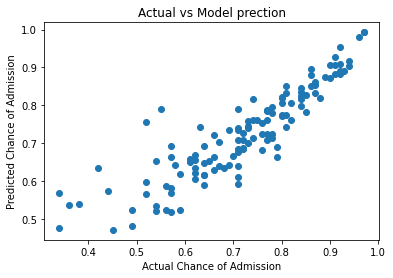

In [50]:
# let's plot and visualize
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predicted Chance of Admission')
plt.title('Actual vs Model prection')
plt.show()

###  It is not deviating too much & it shows good trend.


- There are some point which is show a some kind of error. There are 100's of such error or residuals. We have some kind of matrix which tell us overall residuals.

### Model Evaluation
- Mean absolute Error(MAE): Represents average error.

- Mean Squared Error(MSE): Similar to MAE but noise is exaggerated and larger errors are 'punised'. It is going to punish them, which are very far from them.

- Root mean squared error(RMSE): Most popular matric, similar to MSE, howeverr the result is square rooted to make it more interpretable as it's in base unit. It is recommeded that RMSE be  used as the primary matric to interpret your model.


In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred= regression.predict(x_test)
mean_absolute_error(y_test,y_pred)

0.04520154657215492

In [52]:
mean_squared_error(y_test,y_pred)

0.004341509943091581

In [53]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.06589013540046477

##### We can clearly saw that there are not too much error variance. it mean my  model is going good direction

# You have successfully completed Building Linear Regression model

In [54]:
# Now let's check if our model is overfitting our  data using regularization

- In real time we never trust or believe one model. we built multiple models, and which one will give us more accuracy we will go throughly.


#### Regularization

When we use regression models to train some data, there is a good chance that the model will overfit the given training data set.
Regularization helps sort this overfitting problem by restricting the degrees of freedom of a given equation i.e. simply reducing the number of degrees of a poly nomial function by reducing their corresponding weights.

- LASSO (L1 form)
- RIDGE ( L2 form)
- ELASTICENT ( less popular)

###### LASSO (Least Absolute Shrnkage and selection Operator Regression( L1 Form))\

- Exp: We have feature { height, email, Phone No., GRE, TOEFL, SOR, LOP, Research,....}
-   Lable= { Chance of admit}
In tis example we can see that height, email, Phone No. features are not related to the label. So In LASSO it will nullify all those feature or it gives 0% importance those feature whose are not related to the  label.

###### RIDGE Regression ( L2 form)
Ridge will identify those column which are not related to label it will give very very less importance of them. {let's say 0.00001403) 

###### Difference between Ridge and Lasso
- If I will take 5 step in one time to get zero error then we will go here where,  so instead of it we will take small steps to reach zerro error.
- My model learn too fast in bigger steps so I have to control it.
###### What is the best learning rate, someone will tell us to go with this learning rate and learn it & train form it.
###### LassoCV & RidgeCV give  us the best learning rate.


In [55]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV

In [56]:
# Lasso Regularization
# LassoCV will return best alpha after max iteration
# Normalization is subtracting the mean and dividing by the L2 form. We will tell more about normalization more in upcoming models.
lasso_cv=LassoCV(alphas= None, max_iter= 100, normalize= True)

# if you have a huge data sett, you can increase max_iteration.
lasso_cv.fit(x_train,y_train)     # Lasso will first understand our data that's why we pass training data.

C:\Users\Hello\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(max_iter=100, normalize=True)

In [57]:
# best alpha parameter
alpha=lasso_cv.alpha_

In [58]:
alpha

5.237725782426322e-05

In [59]:
# Now that we have  best parameter, let's use lasso regression and see how well our data has fitted before 
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=5.237725782426322e-05)

In [60]:
lasso_reg.score(x_test,y_test)

0.7876525440220872

###### Using Ridge Regression

In [66]:
# Redge cv will return best alpha and coefficients after performing 10 cross validation { cross valiaton is upcoming topic}
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01), normalize= True)
# if we take here alphas = None, then the model take it's own range. May be it will take smallest steps and then it will take time respectvely.
# But now here i am forcing model to give us in above range ..
ridgecv.fit(x_train, y_train)
ridgecv.alpha_

C:\Users\Hello\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.011

In [67]:
ridgecv.fit(x_train,y_train)
ridgecv.alpha_

C:\Users\Hello\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.011

In [69]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.011)

In [70]:
ridge_model.score(x_test, y_test)

0.7875907880983914

### After compare Lasso score & Ridge Score with R squared score, then we got conclusion that our Model is not overfitted.